<a href="https://colab.research.google.com/github/Vanshbhattok/AIML-Project-Fithub-/blob/main/Final_Project_of_AIML_Fitness_Analyser_and_Health_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please enter the following details to get your fitness analysis:
Age: 25
Gender (Male/Female): M
Height in cm: 158
Weight in kg: 79
Activity level (1-5, where 1 is Sedentary and 5 is Very Active): 4
Average Heart Rate: 120
Cholesterol level (mg/dL): 10
Glucose level (mg/dL): 20

Number of columns in the dataset: 8

Checking for null values in the dataset:
Age               0
Gender            0
Height            0
Weight            0
Activity Level    0
Heart Rate        0
Cholesterol       0
Glucose           0
dtype: int64

No missing values in the dataset!

Eigenvalues from PCA: [0.]
Explained variance ratio: [nan]
Total explained variance: nan

Your personalized fitness analysis:
Your fitness status is: Obese
BMI: nan
Keep up the good work! Stay active and maintain a healthy lifestyle.



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
<ipython-input-1-ad14aafc8101>:99: RuntimeWarning: invalid value encountered in scalar divide
  bmi = weight / (user_row['Height'] / 100) ** 2  # BMI calculation


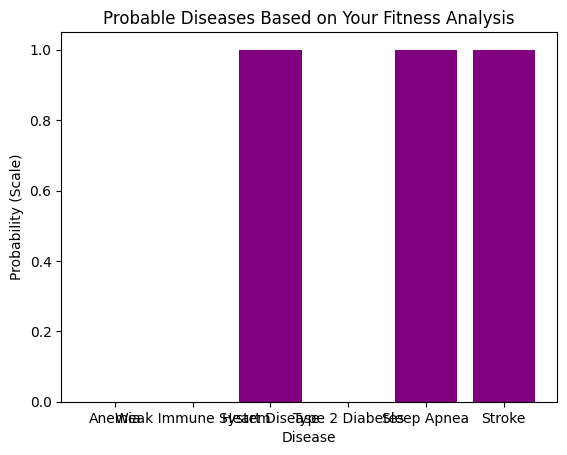

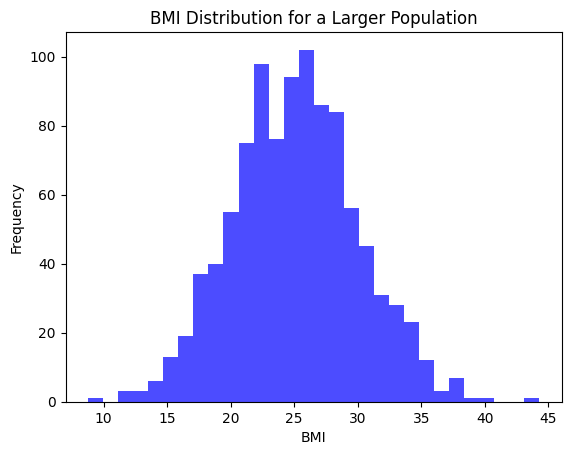

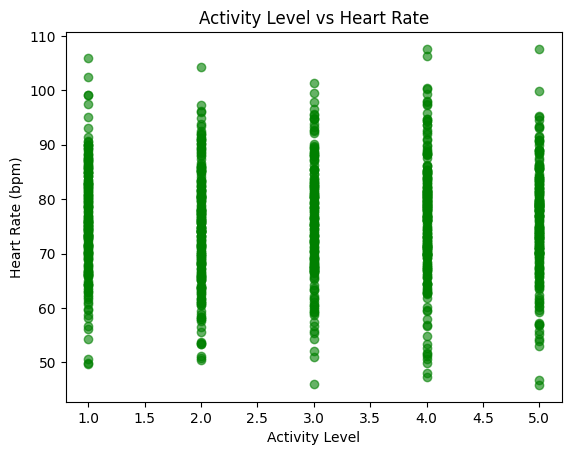

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fitness_medical_report.txt'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
import os

# Step 1: Count Number of Columns in the Data
def count_columns(user_data):
    num_columns = user_data.shape[1]  # Shape returns a tuple (rows, columns)
    print(f"\nNumber of columns in the dataset: {num_columns}")

# Step 2: Check for Null Values in the Data
def check_null_values(user_data):
    null_values = user_data.isnull().sum()
    print("\nChecking for null values in the dataset:")
    print(null_values)
    if null_values.any():
        print("\nThere are some missing values in the dataset!")
    else:
        print("\nNo missing values in the dataset!")

# Step 3: Display Eigenvalues and Explained Variance Ratio from PCA
def pca_analysis(pca_model, user_data):
    # Eigenvalues (singular values)
    eigenvalues = pca_model.singular_values_
    print(f"\nEigenvalues from PCA: {eigenvalues}")

    # Explained variance ratio (how much variance each component explains)
    explained_variance_ratio = pca_model.explained_variance_ratio_
    print(f"Explained variance ratio: {explained_variance_ratio}")

    # Total explained variance
    total_explained_variance = sum(explained_variance_ratio)
    print(f"Total explained variance: {total_explained_variance:.2f}")

# Step 4: Collect User Data
def get_user_data():
    print("Please enter the following details to get your fitness analysis:")
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ").lower()
    height = float(input("Height in cm: "))
    weight = float(input("Weight in kg: "))
    activity_level = int(input("Activity level (1-5, where 1 is Sedentary and 5 is Very Active): "))
    heart_rate = int(input("Average Heart Rate: "))

    # Assuming health data (e.g., cholesterol levels, BMI)
    cholesterol = int(input("Cholesterol level (mg/dL): "))
    glucose = int(input("Glucose level (mg/dL): "))

    # Creating a DataFrame for the user input
    user_data = pd.DataFrame({
        "Age": [age],
        "Gender": [gender],
        "Height": [height],
        "Weight": [weight],
        "Activity Level": [activity_level],
        "Heart Rate": [heart_rate],
        "Cholesterol": [cholesterol],
        "Glucose": [glucose]
    })

    return user_data

# Step 5: Data Preprocessing
def preprocess_data(user_data):
    # Scaling the data (for features that require it)
    scaler = StandardScaler()
    features = ['Height', 'Weight', 'Activity Level', 'Heart Rate', 'Cholesterol', 'Glucose']
    user_data[features] = scaler.fit_transform(user_data[features])

    return user_data

# Step 6: Apply PCA
def apply_pca(user_data):
    pca = PCA(n_components=1)  # Reduce to 1 component for a single user
    pca_result = pca.fit_transform(user_data[['Height', 'Weight', 'Activity Level', 'Heart Rate', 'Cholesterol', 'Glucose']])
    pca_df = pd.DataFrame(pca_result, columns=['PC1'])

    # Merge PCA result with original data
    user_data = pd.concat([user_data, pca_df], axis=1)

    return user_data, pca


# Step 7: Fitness Analysis
def fitness_analysis(user_row):
    age = user_row['Age']
    activity_level = user_row['Activity Level']
    heart_rate = user_row['Heart Rate']
    weight = user_row['Weight']

    # Basic analysis based on BMI
    bmi = weight / (user_row['Height'] / 100) ** 2  # BMI calculation

    # Simple fitness analysis
    if bmi < 18.5:
        health_status = "Underweight"
        diseases = ["Anemia", "Weak Immune System"]
    elif 18.5 <= bmi < 24.9:
        health_status = "Healthy"
        diseases = []
    elif 25 <= bmi < 29.9:
        health_status = "Overweight"
        diseases = ["Heart Disease", "Type 2 Diabetes"]
    else:
        health_status = "Obese"
        diseases = ["Heart Disease", "Sleep Apnea", "Stroke"]

    # Analyzing heart rate and activity level
    if heart_rate > 100 and activity_level < 3:
        activity_advice = "Consider increasing physical activity to improve cardiovascular health."
    else:
        activity_advice = "Keep up the good work! Stay active and maintain a healthy lifestyle."

    # Create fitness report
    analysis_report = f"Your fitness status is: {health_status}\n"
    analysis_report += f"BMI: {bmi:.2f}\n{activity_advice}\n"

    return analysis_report, diseases


# Step 8: Generate Disease Chart
def generate_disease_chart(diseases):
    disease_counts = {"Anemia": 0, "Weak Immune System": 0, "Heart Disease": 0, "Type 2 Diabetes": 0,
                      "Sleep Apnea": 0, "Stroke": 0}

    for disease in diseases:
        disease_counts[disease] += 1

    plt.bar(disease_counts.keys(), disease_counts.values(), color='purple')
    plt.title("Probable Diseases Based on Your Fitness Analysis")
    plt.xlabel("Disease")
    plt.ylabel("Probability (Scale)")
    plt.show()

# Step 9: Generate BMI Distribution Chart
def generate_bmi_distribution():
    # Generate a simple random BMI distribution for a larger population (simulating a dataset)
    np.random.seed(42)
    bmi_values = np.random.normal(25, 5, 1000)

    plt.hist(bmi_values, bins=30, color='blue', alpha=0.7)
    plt.title("BMI Distribution for a Larger Population")
    plt.xlabel("BMI")
    plt.ylabel("Frequency")
    plt.show()

# Step 10: Generate Activity vs Heart Rate Chart
def generate_activity_vs_heart_rate():
    activity_level = np.random.randint(1, 6, 1000)
    heart_rate = np.random.normal(75, 10, 1000)

    plt.scatter(activity_level, heart_rate, color='green', alpha=0.6)
    plt.title("Activity Level vs Heart Rate")
    plt.xlabel("Activity Level")
    plt.ylabel("Heart Rate (bpm)")
    plt.show()

# Step 11: Generate Medical Report
def generate_medical_report(user_data, analysis_report, diseases):
    report = f"Fitness Analysis Report\n\n{analysis_report}\n\nProbable Diseases:\n"
    for disease in diseases:
        report += f"- {disease}\n"

    # Adding user's data to the report
    report += "\nUser Data:\n"
    for column in user_data.columns:
        report += f"{column}: {user_data.iloc[0][column]}\n"

    # Saving the report to a file
    file_path = "/mnt/data/fitness_medical_report.txt"
    with open(file_path, "w") as file:
        file.write(report)

    return file_path

# Step 12: Provide Motivational Quote
def display_motivational_quote():
    print("\nMotivational Quote: 'The only bad workout is the one that didn’t happen.'\n")

# Step 13: Generate CSV file from user data
def generate_csv(user_data):
    csv_file_path = "/mnt/data/fitness_data.csv"
    user_data.to_csv(csv_file_path, index=False)
    return csv_file_path

# Step 14: User Interaction for Platform Visit
# Step 11: User Interaction for Platform Visit
def user_interaction():
    visit_choice = input("\nWould you like to visit fitness platforms for more information? (Yes/No): ").strip().lower()

    if visit_choice == "yes":
        # Provide the URLs to the user for manual access
        print("\nHere are some helpful fitness resources you can visit:")
        print("YouTube: https://www.youtube.com/c/Blogilates")
        print("Website: https://www.healthline.com/fitness")
        print("You can manually open these links in your browser.")
    else:
        # Thank you message with a formal exit
        print("\nThank you for using the Fitness Analyzer and Health Checker!")
        print("We hope you continue your health journey and visit us again!")


# Main function to execute all steps
def main():
    user_data = get_user_data()  # Get user data input

    # Count the number of columns
    count_columns(user_data)

    # Check for null values
    check_null_values(user_data)

    # Preprocess data
    scaled_data = preprocess_data(user_data)

    # Apply PCA
    user_data_with_pca, pca_model = apply_pca(scaled_data)

    # Perform PCA analysis
    pca_analysis(pca_model, user_data)

    # Perform fitness analysis
    analysis_report, diseases = fitness_analysis(user_data.iloc[0])
    print("\nYour personalized fitness analysis:")
    print(analysis_report)

    # Generate disease chart
    generate_disease_chart(diseases)

    # Generate additional charts
    generate_bmi_distribution()
    generate_activity_vs_heart_rate()

    # Generate and save medical report
    report_file_path = generate_medical_report(user_data, analysis_report, diseases)
    print("\nYour detailed medical report is ready for download!")
    files.download(report_file_path)

    # Provide motivational quote
    display_motivational_quote()

    # Generate and download the user dataset
    csv_file_path = generate_csv(user_data)
    print("\nYour fitness data has been saved as a CSV file!")
    files.download(csv_file_path)

    # Ask if the user wants to visit fitness platforms
    user_interaction()

# Run the program
main()
2